## Final Project
### Nadimul Hasan

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models.coherencemodel import CoherenceModel
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.metrics import silhouette_score
from gensim import corpora
from gensim.models import LdaModel
from gensim.parsing.preprocessing import preprocess_string
import string
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

In [2]:
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt

### Read Data

In [3]:
data1 = pd.read_csv('articles1.csv')
data1.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [4]:
data2 = pd.read_csv('articles2.csv')
data2.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,53293,73471,Patriots Day Is Best When It Digs Past the Her...,Atlantic,David Sims,2017-01-11,2017.0,1.0,NaN,"Patriots Day, Peter Berg’s new thriller that r..."
1,53294,73472,A Break in the Search for the Origin of Comple...,Atlantic,Ed Yong,2017-01-11,2017.0,1.0,NaN,"In Norse mythology, humans and our world were ..."
2,53295,73474,Obama’s Ingenious Mention of Atticus Finch,Atlantic,Spencer Kornhaber,2017-01-11,2017.0,1.0,NaN,“If our democracy is to work in this increasin...
3,53296,73475,"Donald Trump Meets, and Assails, the Press",Atlantic,David A. Graham,2017-01-11,2017.0,1.0,NaN,Updated on January 11 at 5:05 p. m. In his fir...
4,53297,73476,Trump: ’I Think’ Hacking Was Russian,Atlantic,Kaveh Waddell,2017-01-11,2017.0,1.0,NaN,Updated at 12:25 p. m. After months of equivoc...


In [5]:
data3 = pd.read_csv('articles3.csv')
data3.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,103459,151908,Alton Sterling’s son: ’Everyone needs to prote...,Guardian,Jessica Glenza,2016-07-13,2016.0,7.0,https://www.theguardian.com/us-news/2016/jul/1...,The son of a Louisiana man whose father was sh...
1,103460,151909,Shakespeare’s first four folios sell at auctio...,Guardian,NaN,2016-05-25,2016.0,5.0,https://www.theguardian.com/culture/2016/may/2...,Copies of William Shakespeare’s first four boo...
2,103461,151910,My grandmother’s death saved me from a life of...,Guardian,Robert Pendry,2016-10-31,2016.0,10.0,https://www.theguardian.com/commentisfree/2016...,"Debt: $20, 000, Source: College, credit cards,..."
3,103462,151911,I feared my life lacked meaning. Cancer pushed...,Guardian,Bradford Frost,2016-11-26,2016.0,11.0,https://www.theguardian.com/commentisfree/2016...,"It was late. I was drunk, nearing my 35th birt..."
4,103463,151912,Texas man serving life sentence innocent of do...,Guardian,NaN,2016-08-20,2016.0,8.0,https://www.theguardian.com/us-news/2016/aug/2...,A central Texas man serving a life sentence fo...


### Merge all datasets together

In [6]:
data = pd.concat([data1, data2, data3], ignore_index=True)
data.shape

(142570, 10)

### Creating a function to preprocess data

In [7]:
def text_normalizer(text):
    processed_text = preprocess_string(text)
    return processed_text

### Training our model

In [8]:
import datetime
print('Start:',datetime.datetime.now())
# Tokenize the documents
tokenized_docs = [text_normalizer(doc) for doc in data['content']]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(tokenized_docs)

# Create a bag-of-words corpus
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Build the LDA model
lda_model = LdaModel(corpus, num_topics=20, id2word=dictionary)
print('End:', datetime.datetime.now())

Start: 2023-12-01 15:30:09.430713
End: 2023-12-01 15:40:46.857803


### Generating topic-word distribution

In [9]:
# Print the topic-word distributions
topic_wise = pd.DataFrame(columns=['Topic', 'Words'])
for topic_id in range(lda_model.num_topics):
    topic_words = [word for word, _ in lda_model.show_topic(topic_id, topn=300)]
    topic_wise = topic_wise.append({
        'Topic': topic_id + 1,
        'Words': ', '.join(topic_words)
    }, ignore_index=True)
topic_wise.head()

,Topic,Words
0,1,"media, twitter, post, peopl, polit, new, prote..."
1,2,"percent, said, compani, year, market, billion,..."
2,3,"said, trump, investig, report, presid, hous, o..."
3,4,"said, polic, offic, gun, kill, shoot, report, ..."
4,5,"it’, like, peopl, think, know, don’t, thing, w..."


### Genetating Doccument wise topic distribution

In [10]:
doccument_wise = pd.DataFrame(columns=['Document', 'Topic Distribution'])
for i in range(len(corpus)):
    doc_topic_distribution = lda_model.get_document_topics(corpus[i])

    # Sort the topics by probability in descending order
    sorted_topics = sorted(doc_topic_distribution, key=lambda x: x[1], reverse=True)

    # Append the results to the DataFrame
    doccument_wise = doccument_wise.append({
        'Document': f"Document {i + 1}",
        'Topic Distribution': sorted_topics
    }, ignore_index=True)
    
doccument_wise.head()

,Document,Topic Distribution
0,Document 1,"[(14, 0.40581056), (12, 0.20204537), (19, 0.18..."
1,Document 2,"[(3, 0.56732047), (4, 0.1275306), (8, 0.103550..."
2,Document 3,"[(11, 0.40020463), (13, 0.24912247), (17, 0.06..."
3,Document 4,"[(11, 0.48316786), (5, 0.1352162), (13, 0.1151..."
4,Document 5,"[(10, 0.79185814), (19, 0.174577), (0, 0.01757..."


### Using PyLDAvis to visualize our model

In [11]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
p

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.112607 -0.026673       1        1  14.196362
12     0.047918 -0.122389       2        1   9.565227
11    -0.218464  0.020840       3        1   6.901313
1      0.068836  0.087887       4        1   6.603438
19     0.150509 -0.091599       5        1   6.184985
14     0.117610 -0.077658       6        1   5.403125
3     -0.081288 -0.023588       7        1   5.348586
2      0.030196 -0.164080       8        1   5.157311
13    -0.176884  0.009868       9        1   4.843075
8     -0.051358  0.150707      10        1   4.699405
0      0.015202 -0.148287      11        1   4.583239
15     0.029511  0.088176      12        1   4.269883
6      0.109897  0.058948      13        1   4.157580
17     0.015960 -0.046779      14        1   3.173756
5     -0.142764  0.044806      15        1   3.034677
9      0.137278  0.083839      16        1   2.978965
16    -0.100969 -0.141035      17        1   2.708471
18     0.115866  0.007873      18        1   2.408939
7     -0.026045  0.104868      19        1   1.950655
10     0.071597  0.184277      20        1   1.831008, topic_info=            Term           Freq          Total Category  logprob  loglift
253        trump  387143.000000  387143.000000  Default  30.0000  30.0000
218         said  612817.000000  612817.000000  Default  29.0000  29.0000
208   republican  124566.000000  124566.000000  Default  28.0000  28.0000
835        polic   81642.000000   81642.000000  Default  27.0000  27.0000
1737     clinton  106590.000000  106590.000000  Default  26.0000  26.0000
...          ...            ...            ...      ...      ...      ...
158          new    5688.424666  281310.955278  Topic20  -5.1366   0.0993
270         year    5411.343804  236345.433862  Topic20  -5.1866   0.2235
2507     develop    3439.613223   32351.315893  Topic20  -5.6397   1.7590
247         time    3792.374450  199361.384509  Topic20  -5.5421   0.0382
257         unit    3490.023458   91472.074916  Topic20  -5.6252   0.7342

[1713 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
29825     19  0.996725   abaaoud
29828     19  0.999247  abdeslam
15368     13  0.998570  abdullah
16144      8  0.999106    abedin
3837       1  0.007809     abort
...      ...       ...       ...
1168      19  0.003067      “the
1168      20  0.011251      “the
40775      3  0.999803      ”and
37640      8  0.999053      ”how
41436      8  0.999114    ”trump

[11171 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 13, 12, 2, 20, 15, 4, 3, 14, 9, 1, 16, 7, 18, 6, 10, 17, 19, 8, 11])

In [12]:
# Saving output as text file 
doccument_wise.to_csv('doccument_wise.txt', sep='\t', index=False)
topic_wise.to_csv('topic_wise.txt', sep='\t', index=False)

### Part -2

In [13]:
# Making a new column for best matched topic
doccument_wise['Topic'] = doccument_wise['Topic Distribution'].apply(lambda x: x[0][0])

In [14]:
# Merging Doccument wise and main dataframe
final_df = pd.merge(data, doccument_wise, left_index=True, right_index=True)

In [15]:
# Removing unecessary columns
final_df = final_df[['id', 'date', 'Document','Topic Distribution', 'Topic']]
final_df.head()

,id,date,Document,Topic Distribution,Topic
0,17283,2016-12-31,Document 1,"[(14, 0.40581056), (12, 0.20204537), (19, 0.18...",14
1,17284,2017-06-19,Document 2,"[(3, 0.56732047), (4, 0.1275306), (8, 0.103550...",3
2,17285,2017-01-06,Document 3,"[(11, 0.40020463), (13, 0.24912247), (17, 0.06...",11
3,17286,2017-04-10,Document 4,"[(11, 0.48316786), (5, 0.1352162), (13, 0.1151...",11
4,17287,2017-01-02,Document 5,"[(10, 0.79185814), (19, 0.174577), (0, 0.01757...",10


### Plotting most popular topics

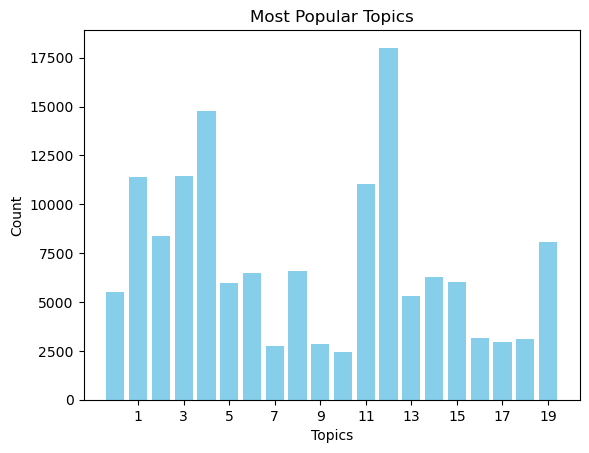

In [16]:
counts = final_df['Topic'].value_counts()
#plt.bar()
plt.bar(counts.index, counts, color='skyblue')

# Set titles
plt.xlabel('Topics')
plt.ylabel('Count')
plt.title('Most Popular Topics')
plt.xticks(range(1,21)[::2])
plt.show()

### Grouping data for popular topics

In [17]:
list(counts.index[:4])

[12, 4, 3, 1]

In [18]:
#Convert to date time
final_df['date'] = pd.to_datetime(final_df['date'])

# Set filter range
start_date = '2016-01-01'
end_date = '2017-12-31'

# Filter data for the specified period and choose top 4 topics
filtered_df = final_df[(final_df['date'].between(start_date, end_date)) & (final_df['Topic'].isin(list(counts.index[:4])))]

#Group by month
filtered_df['month_year'] = filtered_df['date'].dt.to_period('M')
topic_counts = filtered_df.groupby(['month_year', 'Topic']).size().unstack(fill_value=0)

### Ploting popular topics from 2016 and 2017

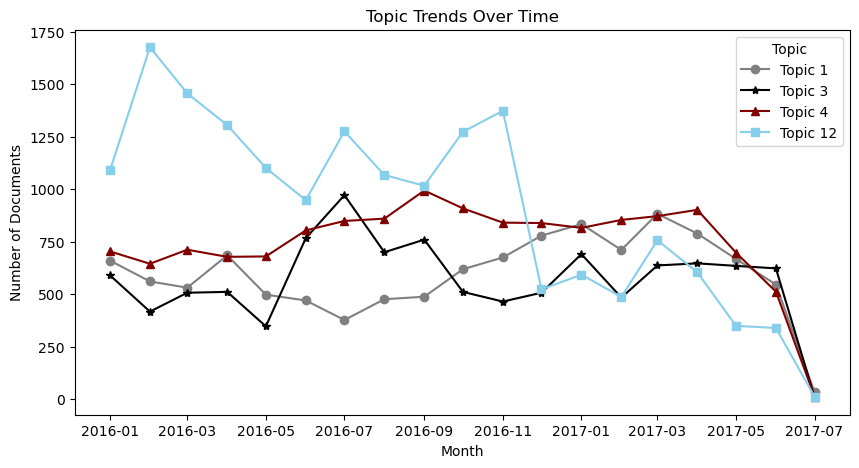

In [27]:
# Plot the trends
# Set markers and colors
markers = ['o', '*', '^', 's']
colors = ['grey', 'black', 'maroon', 'skyblue']
plt.figure(figsize=(10, 5))
i = 0

#Plotting each topic
for topic in topic_counts.columns:
    plt.plot(topic_counts.index.astype('datetime64'), topic_counts[topic], label=f'Topic {topic}', marker=markers[i], color = colors[i])
    i += 1
    
#Set titles
plt.title('Topic Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Documents')
plt.legend(title='Topic')
plt.show()

The last contents are from August 2017. Thus all the plots merge together.

### Model Evaluation

In [21]:
coherence_scores = []
num_topics_range = range(2, 21)

# Trainng model for different number of topics
for num_topics in num_topics_range:
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
    # Finding coherence scores
    coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_docs, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_scores.append(coherence_lda)

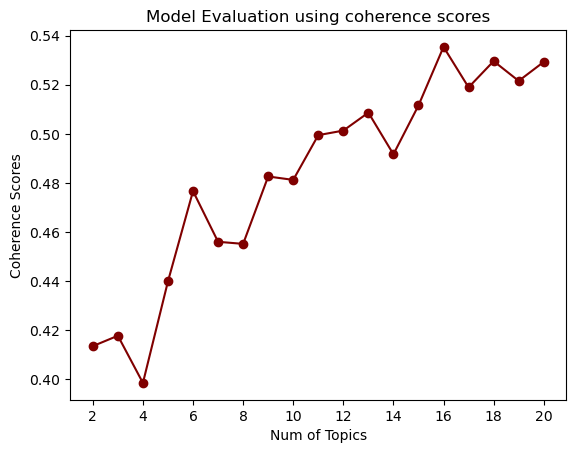

In [28]:
# Plotting graph for scores against topics
plt.plot(num_topics_range, coherence_scores, marker='o', color='maroon')
plt.xlabel('Num of Topics')
plt.ylabel('Coherence Scores')
plt.title('Model Evaluation using coherence scores')
plt.xticks(num_topics_range[::2])
plt.show()